In [1]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

# Measures

In [21]:
results = {}
input_path = "csv/batch_results.csv"
df = pd.read_csv(input_path)

In [22]:
for index in range(len(df)):
    poem_type = df['Input.type'][index]
    for column in df:
        if column.startswith('Answer') or column == 'Input.score':
            answer_type = column.split('.')[1]
            if answer_type not in results:
                results[answer_type] = collections.defaultdict(list)
            results[answer_type][poem_type].append(df[column][index])
for key in results:
    print(key)
    print(results[key])

score
defaultdict(<class 'list'>, {'SINGLE_STORY': [-4.324500186, -4.324500186, -4.324500186, -4.324500186, -4.324500186, -4.324500186], 'SINGLE_NO_STORY': [-4.290722732, -4.290722732, -4.290722732, -4.290722732, -4.290722732], 'DTS_NO_STORY': [-2.474821271, -2.474821271, -2.474821271, -2.474821271, -2.474821271], 'DTS_STORY': [-3.333170687, -3.333170687, -3.333170687, -3.333170687]})
emotion
defaultdict(<class 'list'>, {'SINGLE_STORY': [4, 4, 2, 4, 5, 2], 'SINGLE_NO_STORY': [2, 1, 2, 3, 2], 'DTS_NO_STORY': [5, 4, 2, 3, 2], 'DTS_STORY': [5, 4, 3, 2]})
emotionKeyword
defaultdict(<class 'list'>, {'SINGLE_STORY': ['Frustration', 'rage', 'Mad', 'anger', 'envy', 'angst'], 'SINGLE_NO_STORY': ['wanting', 'Confusion', 'irony', 'Warm', 'contented'], 'DTS_NO_STORY': ['ambition', 'Determination', 'frustration.', 'desire', 'desire'], 'DTS_STORY': ['Contentment', 'Wisdom', 'transformation', 'insight']})
grammar
defaultdict(<class 'list'>, {'SINGLE_STORY': [4, 2, 2, 3, 3, 4], 'SINGLE_NO_STORY': [2, 

In [31]:
import matplotlib.pyplot as plt

for key in results:
    if key == 'emotion' or key == 'grammar' or key == 'like' or key == 'story' or key == 'related':
        if key == 'related':
            print('overall')
        else:
            print(key)
        for poem_type in results[key]:
            print("{0:s} | Mean: {1:.2f}, Std: {2:.2f}".format(poem_type, np.mean(results[key][poem_type]), np.std(results[key][poem_type])))


emotion
SINGLE_STORY | Mean: 3.50, Std: 1.12
SINGLE_NO_STORY | Mean: 2.00, Std: 0.63
DTS_NO_STORY | Mean: 3.20, Std: 1.17
DTS_STORY | Mean: 3.50, Std: 1.12
grammar
SINGLE_STORY | Mean: 3.00, Std: 0.82
SINGLE_NO_STORY | Mean: 3.20, Std: 0.75
DTS_NO_STORY | Mean: 4.00, Std: 0.89
DTS_STORY | Mean: 3.50, Std: 1.12
like
SINGLE_STORY | Mean: 2.17, Std: 0.37
SINGLE_NO_STORY | Mean: 1.40, Std: 0.49
DTS_NO_STORY | Mean: 2.20, Std: 0.75
DTS_STORY | Mean: 2.25, Std: 0.43
overall
SINGLE_STORY | Mean: 5.00, Std: 2.00
SINGLE_NO_STORY | Mean: 3.00, Std: 1.26
DTS_NO_STORY | Mean: 6.60, Std: 2.06
DTS_STORY | Mean: 7.75, Std: 1.48
story
SINGLE_STORY | Mean: 2.33, Std: 0.47
SINGLE_NO_STORY | Mean: 2.00, Std: 1.10
DTS_NO_STORY | Mean: 3.40, Std: 1.20
DTS_STORY | Mean: 4.00, Std: 0.71


In [34]:
def get_user_score(results, poem_type, poem_id):
    return results['related'][poem_type][poem_id]

def get_our_score(results, poem_type, poem_id):
    return results['score'][poem_type][poem_id]

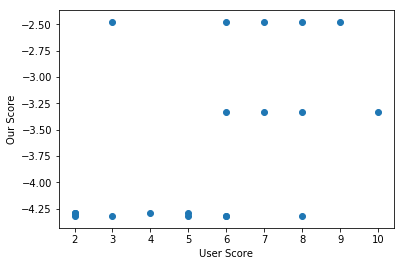

In [35]:
x = []
y = []
for poem_type in results['score']:
    for i in range(len(results['score'][poem_type])):
        x.append(get_user_score(results, poem_type, i))
        y.append(get_our_score(results, poem_type, i))
plt.scatter(x,y)
plt.xlabel('User Score')
plt.ylabel('Our Score')
plt.show()

# Turing

In [13]:
turing_results = collections.defaultdict(list)
input_path = "csv/batch_results_turing.csv"
df_turing = pd.read_csv(input_path)

In [14]:
for index in range(len(df_turing)):
    poem_type = df_turing['Input.type'][index]
    for column in df_turing:
        if column.startswith('Answer'):
            turing_results[poem_type].append(int(df_turing[column][index][0]))
for key in turing_results:
    print(key)
    print(len(turing_results[key]))

HUMAN
235
GENERATED
235


In [15]:
import matplotlib.pyplot as plt

for key in turing_results:
    print("{0:s} | Mean: {1:.2f}, Std: {2:.2f}".format(key, np.mean(turing_results[key]), np.std(turing_results[key])))

HUMAN | Mean: 2.21, Std: 1.30
GENERATED | Mean: 2.74, Std: 1.48


In [20]:
generated = turing_results['GENERATED']

In [21]:
print(len([g for g in generated if g == 1]))

59
